In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
cars = pd.read_csv("dataframe_NoIndex_YesHeader-_C.csv")
print(cars.head())

   Engine Capacity  Cylinders  Drive Type  Fuel Tank Capacity  Fuel Economy  \
0              1.2          3           0                42.0           4.9   
1              1.2          3           0                42.0           4.9   
2              1.4          4           0                45.0           6.3   
3              1.6          4           0                50.0           6.4   
4              1.5          4           0                48.0           5.8   

   Fuel Type  Horsepower  Torque  Transmission  Top Speed  ...  Acceleration  \
0          0          76   100.0             0        170  ...          14.0   
1          0          76   100.0             0        170  ...          14.0   
2          0          75   118.0             1        156  ...          16.0   
3          0         102   145.0             0        180  ...          11.0   
4          0         112   150.0             0        170  ...          10.9   

   Length  Width  Height  Wheelbase  Trunk C

In [3]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 21 columns):
Engine Capacity       4560 non-null float64
Cylinders             4560 non-null int64
Drive Type            4560 non-null int64
Fuel Tank Capacity    4560 non-null float64
Fuel Economy          4560 non-null float64
Fuel Type             4560 non-null int64
Horsepower            4560 non-null int64
Torque                4560 non-null float64
Transmission          4560 non-null int64
Top Speed             4560 non-null int64
Seating Capacity      4560 non-null int64
Acceleration          4560 non-null float64
Length                4560 non-null float64
Width                 4560 non-null float64
Height                4560 non-null float64
Wheelbase             4560 non-null float64
Trunk Capacity        4560 non-null float64
name                  4560 non-null object
price                 4560 non-null float64
currency              4560 non-null int64
Country               4560 non

In [4]:
def countDigit(n):
    count = 0
    while n >= 1:
        n //= 10
        count += 1
    return count

In [5]:
#Need to convert all prices to USD
#USD 1:3.74901 SAR
#USD 1:3.67264 AED
#USD 1:3.63179 QAR
#USD 1:0.30191 KWD
#USD 1:0.38394 OMR
#USD 1:0.37489 BHD

cars.loc[cars['currency'] == 0, 'price'] = cars['price']/3.74901
cars.loc[cars['currency'] == 1, 'price'] = cars['price']/3.67264
cars.loc[cars['currency'] == 2, 'price'] = cars['price']/3.63179
cars.loc[cars['currency'] == 3, 'price'] = cars['price']/0.30191
cars.loc[cars['currency'] == 4, 'price'] = cars['price']/0.38394
cars.loc[cars['currency'] == 5, 'price'] = cars['price']/0.37489
cars['price'] = cars['price'].astype(float)
# print(cars.info())
# print(cars['price'], cars['currency'])


#Need to fix length, width, and height that are larger than 3 digits.
for row in range(cars.shape[0]):
    if countDigit(cars['Length'][row]) >= 3:
        cars['Length'][row] = cars['Length'][row]/(10**(countDigit(cars['Length'][row])-1))
    if countDigit(cars['Width'][row]) >= 3:
        cars['Width'][row] = cars['Width'][row]/(10**(countDigit(cars['Width'][row])-1))
    if countDigit(cars['Height'][row]) >= 3:
        cars['Height'][row] = cars['Height'][row]/(10**(countDigit(cars['Height'][row])-1))
    if countDigit(cars['Wheelbase'][row]) >= 3:
        cars['Wheelbase'][row] = cars['Wheelbase'][row]/(10**(countDigit(cars['Wheelbase'][row])-1))


C:\Users\bacch\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bacch\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bacch\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bacch\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value i

In [6]:
#Droping duplicates
cars = cars.drop_duplicates(subset=['name', 'Country', 'price'], keep='first')

In [7]:
print(cars.describe())

       Engine Capacity    Cylinders   Drive Type  Fuel Tank Capacity  \
count      4276.000000  4276.000000  4276.000000         4276.000000   
mean          3.013471     5.545370     0.994855           70.089687   
std           1.384787     1.937274     0.759792           21.587385   
min           0.000000     3.000000     0.000000           32.000000   
25%           2.000000     4.000000     0.000000           56.000000   
50%           2.900000     6.000000     1.000000           66.000000   
75%           3.700000     6.000000     2.000000           80.000000   
max           8.000000    16.000000     2.000000          159.000000   

       Fuel Economy    Fuel Type   Horsepower       Torque  Transmission  \
count   4276.000000  4276.000000  4276.000000  4276.000000   4276.000000   
mean       9.030978     0.061974   295.838167   400.978251      0.087699   
std        2.933633     0.330365   180.654371   194.877648      0.352141   
min        2.500000     0.000000    67.000000  

In [8]:
print(cars.corr())

                    Engine Capacity  Cylinders  Drive Type  \
Engine Capacity            1.000000   0.912212    0.459765   
Cylinders                  0.912212   1.000000    0.427176   
Drive Type                 0.459765   0.427176    1.000000   
Fuel Tank Capacity         0.682257   0.560597    0.293033   
Fuel Economy               0.796762   0.680555    0.379548   
Fuel Type                  0.019088   0.025028   -0.015504   
Horsepower                 0.625813   0.719625    0.435042   
Torque                     0.791551   0.837822    0.506172   
Transmission              -0.072890  -0.127732   -0.031536   
Top Speed                  0.400726   0.515078    0.491846   
Seating Capacity           0.067779  -0.052023   -0.275815   
Acceleration              -0.502971  -0.569975   -0.520743   
Length                     0.620198   0.525788    0.331201   
Width                      0.459379   0.443649    0.271625   
Height                     0.152255   0.007445   -0.173009   
Wheelbas

In [9]:
print(cars.cov())

                    Engine Capacity      Cylinders    Drive Type  \
Engine Capacity            1.917634       2.447202      0.483742   
Cylinders                  2.447202       3.753029      0.628771   
Drive Type                 0.483742       0.628771      0.577283   
Fuel Tank Capacity        20.395330      23.444527      4.806309   
Fuel Economy               3.236810       3.867766      0.845993   
Fuel Type                  0.008732       0.016018     -0.003892   
Horsepower               156.558110     251.852256     59.713787   
Torque                   213.610983     316.304028     74.947023   
Transmission              -0.035544      -0.087138     -0.008438   
Top Speed                 22.755608      40.918684     15.324333   
Seating Capacity           0.116912      -0.125536     -0.261031   
Acceleration              -1.961227      -3.109205     -1.114090   
Length                     0.352754       0.418370      0.103358   
Width                      0.079811       0.1078

<Figure size 864x504 with 0 Axes>

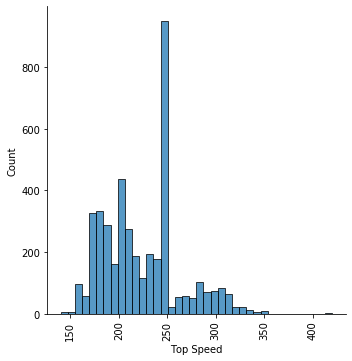

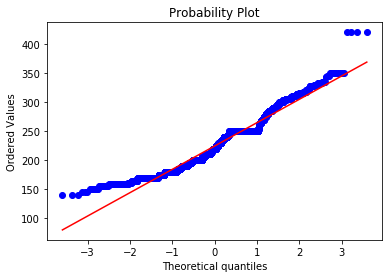

In [10]:
#Exploratory Data Analysis
import statistics
from statistics import mode
from scipy import stats

plt.figure(figsize=(12, 7))
sns.displot(x="Top Speed", data=cars)
plt.xticks(rotation=90)


fig = plt.figure()
res = stats.probplot(cars['Top Speed'], plot=plt)
plt.show()

In [11]:
print(mode(cars['Top Speed']))

250


<Figure size 864x504 with 0 Axes>

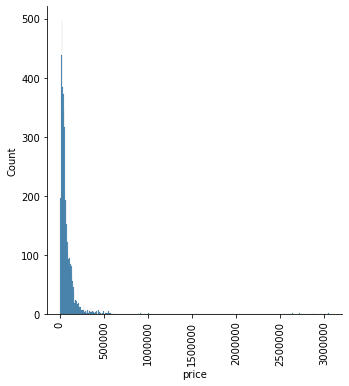

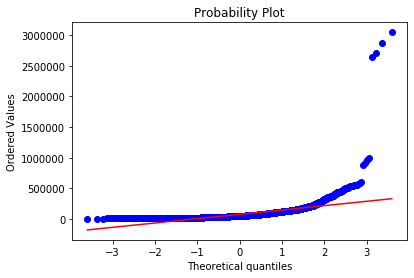

In [12]:
plt.figure(figsize=(12, 7))
sns.displot(x="price", data=cars)
plt.xticks(rotation=90)

fig = plt.figure()
res = stats.probplot(cars['price'], plot=plt)
plt.show()

In [13]:
print(mode(cars['price']))

41345.46133532503


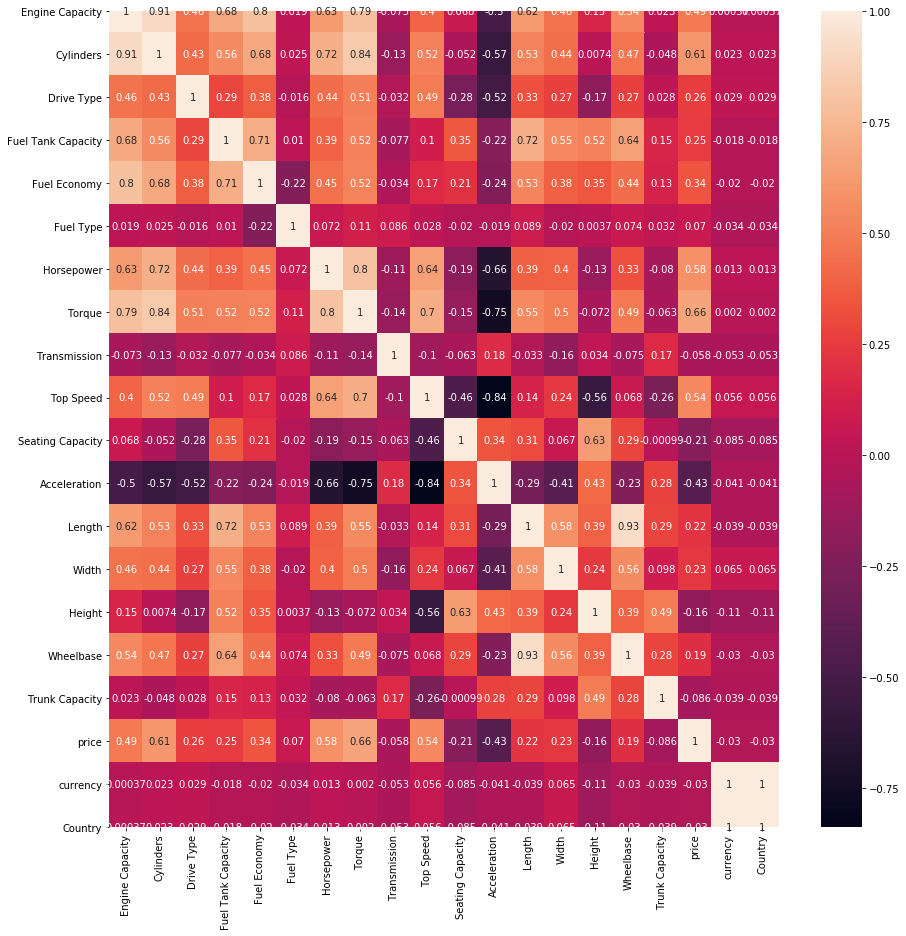

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cars.corr(), annot = True)
plt.show()

In [15]:
#Feature Engineering

#Feature Extraction
#Will create volume from length, width, and height
cars['Volume'] = cars['Length'] * cars['Width'] * cars['Height']
cars_feature = cars
cars_feature = cars_feature.drop(columns=['Length', 'Width', 'Height'])
#Volume in Meters
#Will probably drop wheelbase and currency later after selection.


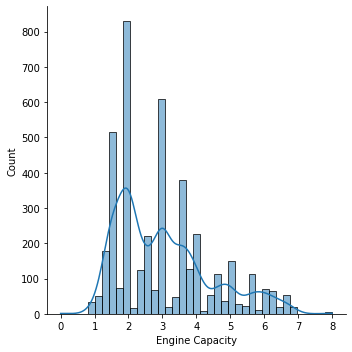

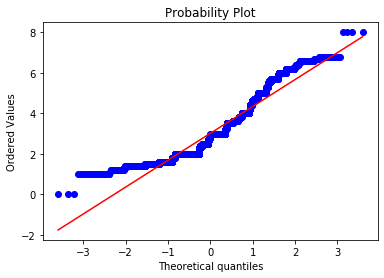

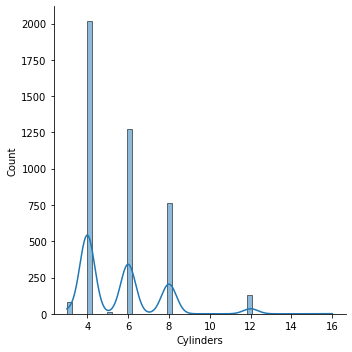

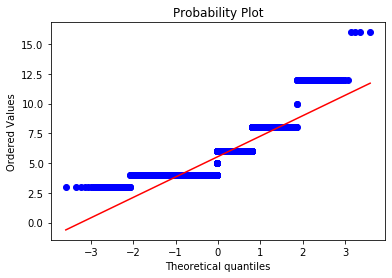

In [16]:
#Feature Transformation
#Need to check: Engine Capacity, cylinders, fueltank capacity, 
#fuel economy, horsepower, torque, acceleration, length, width, height,
#wheelbase, and trunk capacity

sns.displot(x="Engine Capacity", data=cars, kde = True)

fig = plt.figure()
res = stats.probplot(cars['Engine Capacity'], plot=plt)
plt.show()

sns.displot(x="Cylinders", data=cars, kde = True)

fig = plt.figure()
res = stats.probplot(cars['Cylinders'], plot=plt)
plt.show()

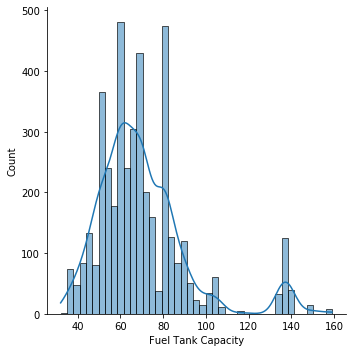

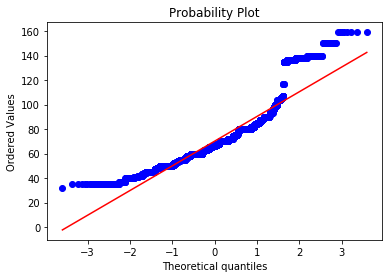

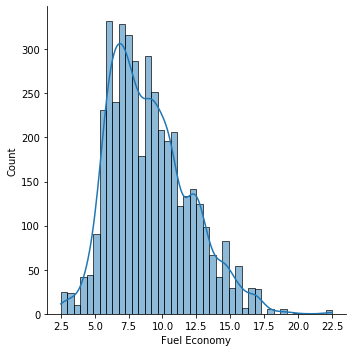

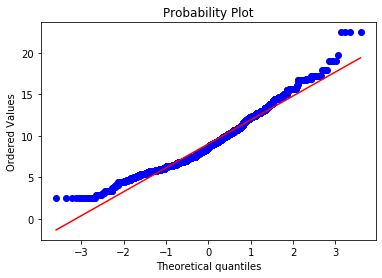

In [17]:
sns.displot(x="Fuel Tank Capacity", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Fuel Tank Capacity'], plot=plt)
plt.show()

sns.displot(x="Fuel Economy", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Fuel Economy'], plot=plt)
plt.show()

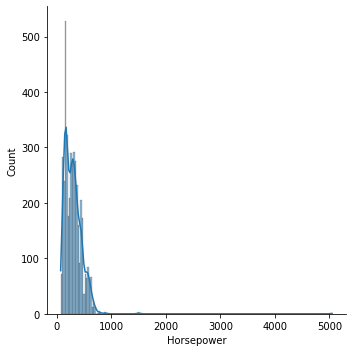

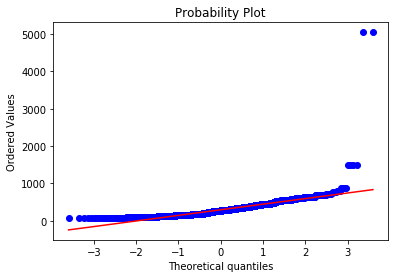

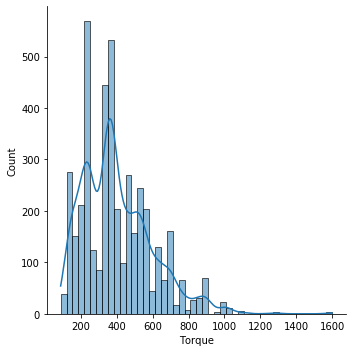

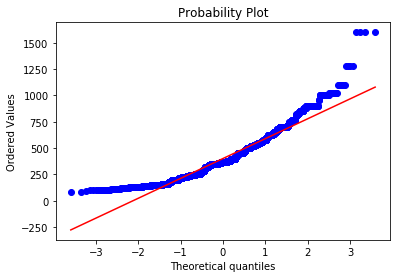

In [18]:
sns.displot(x="Horsepower", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Horsepower'], plot=plt)
plt.show()

sns.displot(x="Torque", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Torque'], plot=plt)
plt.show()


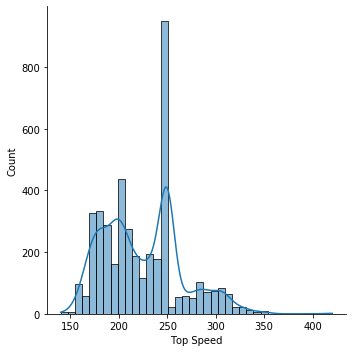

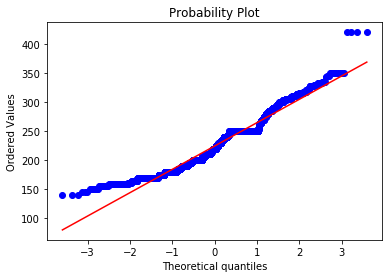

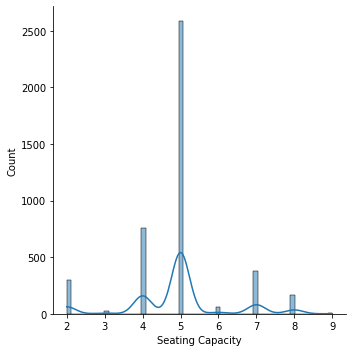

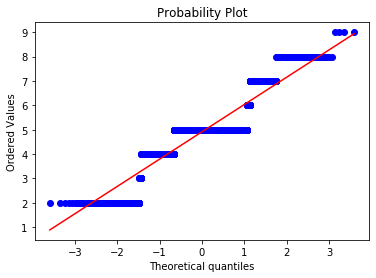

In [19]:
sns.displot(x="Top Speed", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Top Speed'], plot=plt)
plt.show()

sns.displot(x="Seating Capacity", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Seating Capacity'], plot=plt)
plt.show()


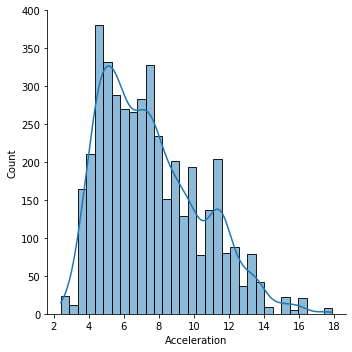

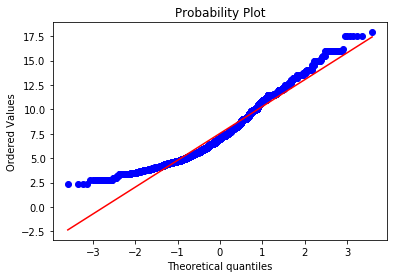

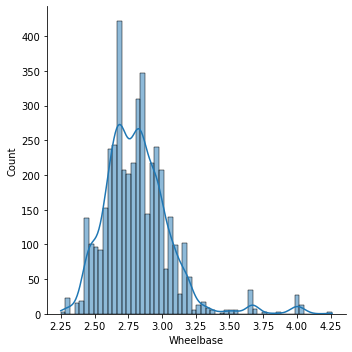

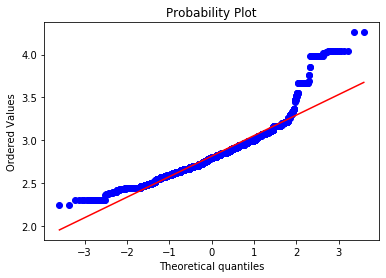

In [20]:
sns.displot(x="Acceleration", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Acceleration'], plot=plt)
plt.show()

sns.displot(x="Wheelbase", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Wheelbase'], plot=plt)
plt.show()


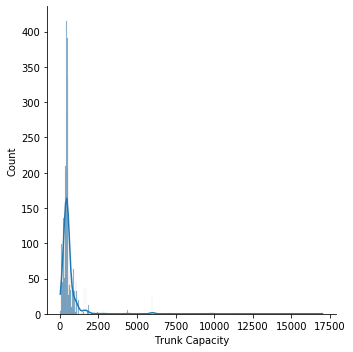

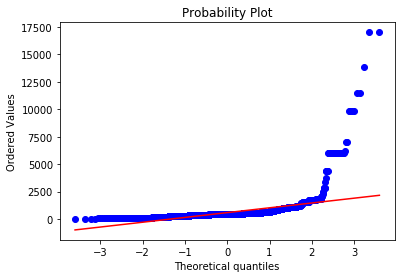

In [21]:
sns.displot(x="Trunk Capacity", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Trunk Capacity'], plot=plt)
plt.show()

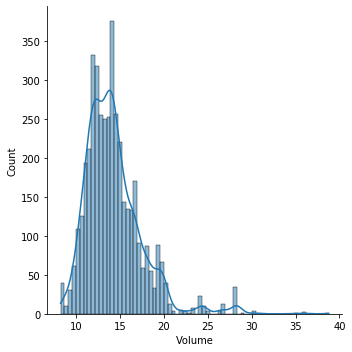

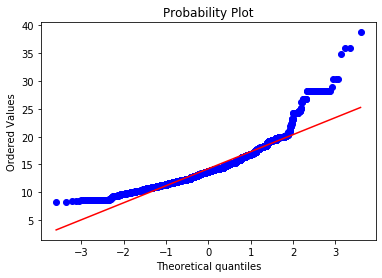

In [22]:
# print(cars.loc[cars['Volume'] == max(cars['Volume'])])
sns.displot(x="Volume", data=cars, kde = True)
fig = plt.figure()
res = stats.probplot(cars['Volume'], plot=plt)
plt.show()

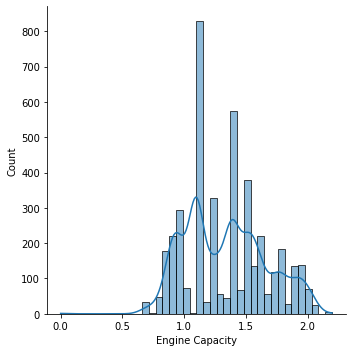

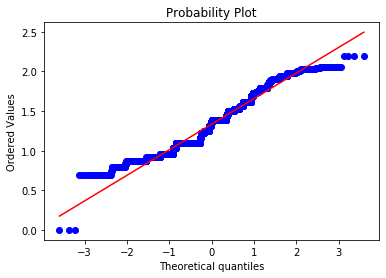

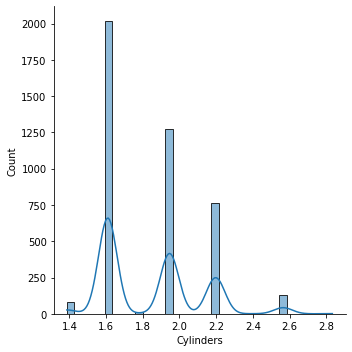

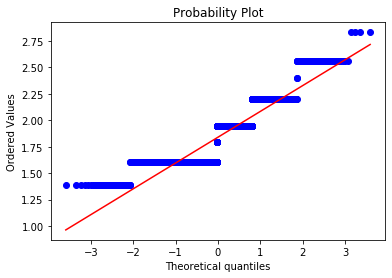

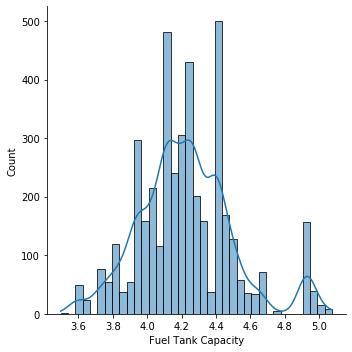

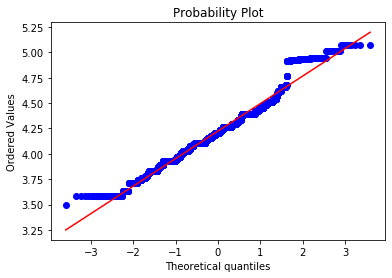

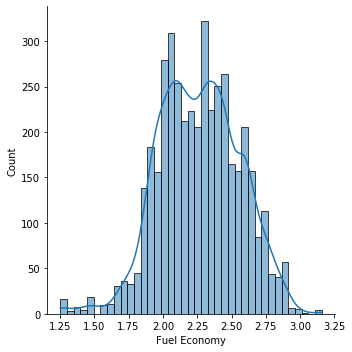

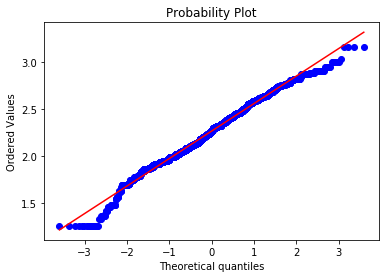

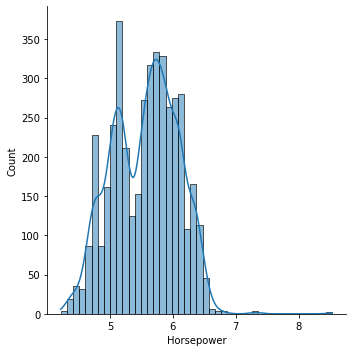

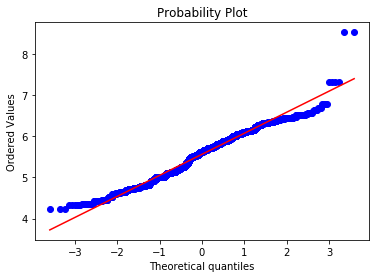

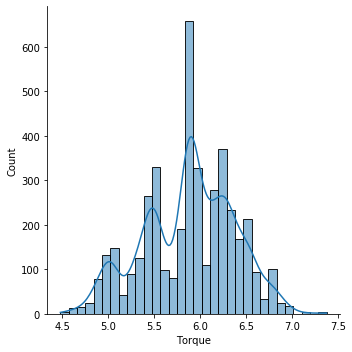

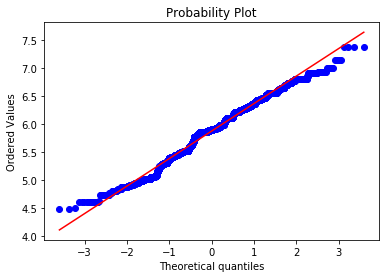

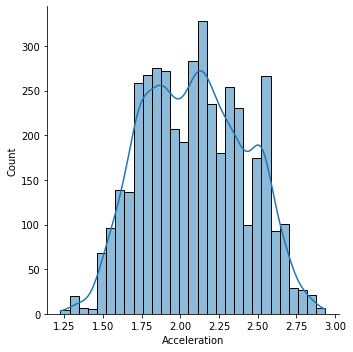

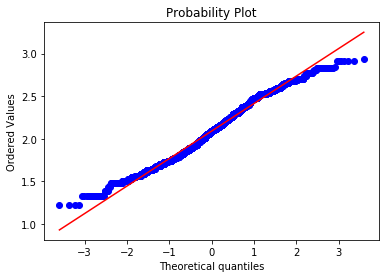

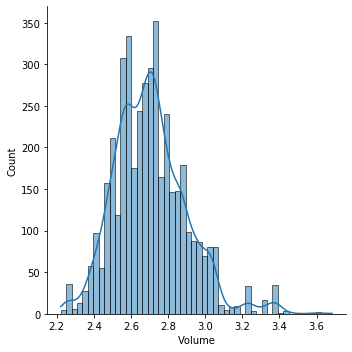

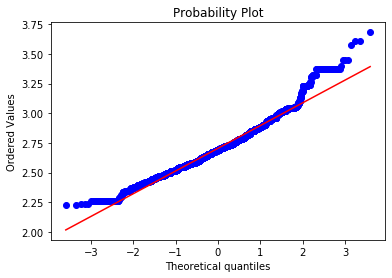

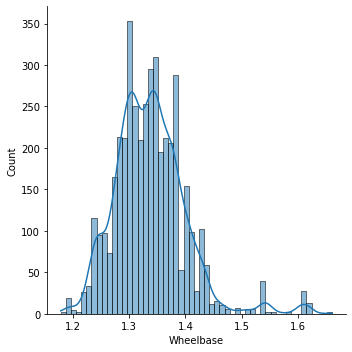

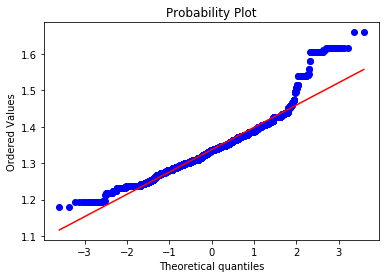

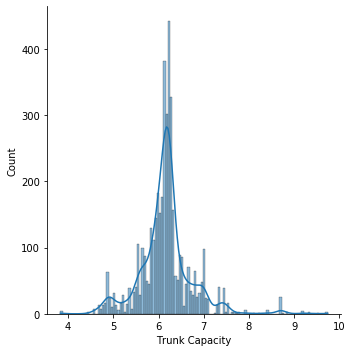

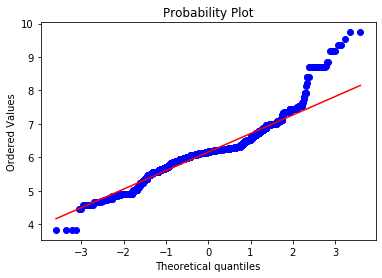

In [23]:
#Normalize all the numerical variables needed. Most of them are skewed right
#an don't line up with the line. 
#Need to check: Engine Capacity, cylinders, fueltank capacity, 
#fuel economy, horsepower, torque, acceleration, length, width, height,
#wheelbase, and trunk capacity
for col in ['Engine Capacity', 'Cylinders', 'Fuel Tank Capacity',
            'Fuel Economy', 'Horsepower', 'Torque', 'Acceleration', 
           'Volume', 'Wheelbase', 'Trunk Capacity']:
    cars[col] = np.log1p(cars[col])
    sns.displot(x=col, data=cars, kde = True)
    fig = plt.figure()
    res = stats.probplot(cars[col], plot=plt)
    plt.show()


In [24]:
#Robust Scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_col = cars_feature
X_col = X_col.drop(['price', 'Country', 'currency', 'name'], axis=1)
# print(X_col.head())
# X_train_scaled = scaler.fit_transform(X_train.values)
X_scaled = scaler.fit_transform(X_col.values)
# print(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns = ['Engine Capacity', 'Cylinders', 'Drive Type', 'Fuel Tank Capacity',
            'Fuel Economy', 'Fuel Type', 'Horsepower', 'Torque', 
            'Transmission', 'Top Speed', 'Seating Capacity', 'Acceleration', 
            'Wheelbase', 'Trunk Capacity','Volume'])
# print(X_scaled.head())


In [26]:
#Do feature selection with Pearson Correlation test
from scipy.stats import stats
for col in ['Engine Capacity', 'Cylinders', 'Drive Type', 'Fuel Tank Capacity',
            'Fuel Economy', 'Fuel Type', 'Horsepower', 'Torque', 
            'Transmission', 'Top Speed', 'Seating Capacity', 'Acceleration', 
            'Wheelbase', 'Trunk Capacity','Volume']:

    print(col, ':')
    print('(Correlation, p-value)')
    print(stats.pearsonr(X_scaled[col], cars['price']))
    print('\n')

Engine Capacity :
(Correlation, p-value)
(0.4855696954008153, 6.920719997201396e-252)


Cylinders :
(Correlation, p-value)
(0.6055479585985701, 0.0)


Drive Type :
(Correlation, p-value)
(0.2558418047711355, 7.074980464160999e-65)


Fuel Tank Capacity :
(Correlation, p-value)
(0.2477197301326582, 8.250406857246237e-61)


Fuel Economy :
(Correlation, p-value)
(0.3441918524177089, 3.3319051500551337e-119)


Fuel Type :
(Correlation, p-value)
(0.07026063612934763, 4.250069231066791e-06)


Horsepower :
(Correlation, p-value)
(0.5769138697851373, 0.0)


Torque :
(Correlation, p-value)
(0.6646848540699242, 0.0)


Transmission :
(Correlation, p-value)
(-0.05808898341813288, 0.00014434434415605129)


Top Speed :
(Correlation, p-value)
(0.5445285168868164, 0.0)


Seating Capacity :
(Correlation, p-value)
(-0.2129132064452045, 5.019425975259784e-45)


Acceleration :
(Correlation, p-value)
(-0.4253065787517505, 1.8817668959642618e-187)


Wheelbase :
(Correlation, p-value)
(0.19430669409109835, 1.

In [ ]:
#End Phase 1